In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
from scipy.stats import iqr

In [26]:
#Import dataset
employee_data = pd.read_csv('/Users/peytonbailey/WGU Data Science Masters/D599- Data Preparation and Exploration/Task One/Employee Turnover Dataset.csv')




In [27]:
#Inspect column names and data types
print(employee_data.columns)
print(employee_data.dtypes)
print(employee_data.describe())

Index(['EmployeeNumber', 'Age', 'Tenure', 'Turnover', 'HourlyRate ',
       'HoursWeekly', 'CompensationType', 'AnnualSalary',
       'DrivingCommuterDistance', 'JobRoleArea', 'Gender', 'MaritalStatus',
       'NumCompaniesPreviouslyWorked', 'AnnualProfessionalDevHrs',
       'PaycheckMethod', 'TextMessageOptIn'],
      dtype='object')
EmployeeNumber                    int64
Age                               int64
Tenure                            int64
Turnover                         object
HourlyRate                       object
HoursWeekly                       int64
CompensationType                 object
AnnualSalary                    float64
DrivingCommuterDistance           int64
JobRoleArea                      object
Gender                           object
MaritalStatus                    object
NumCompaniesPreviouslyWorked    float64
AnnualProfessionalDevHrs        float64
PaycheckMethod                   object
TextMessageOptIn                 object
dtype: object
       E

In [28]:
# Find duplicates
duplicates = employee_data.duplicated('EmployeeNumber', keep = False)

# Sort data by employee number
duplicated_data = employee_data[duplicates].sort_values(by = 'EmployeeNumber')

# Print all columns of duplicated data
print(duplicated_data)



       EmployeeNumber  Age  Tenure Turnover HourlyRate   HoursWeekly  \
0                   1   28       6      Yes     $24.37            40   
10100               1   28       6      Yes     $24.37            40   
10101               2   33       2      Yes     $24.37            40   
1                   2   33       2      Yes     $24.37            40   
2                   3   22       1       No     $22.52            40   
...               ...  ...     ...      ...         ...          ...   
10196              97   44       6       No     $71.90            40   
10197              98   58      19       No     $71.90            40   
97                 98   58      19       No     $71.90            40   
98                 99   48      17      Yes     $71.33            40   
10198              99   48      17      Yes     $71.33            40   

      CompensationType  AnnualSalary  DrivingCommuterDistance  \
0               Salary       50689.6                       89   
10100

In [29]:
# Drop duplicates
employee_data.drop_duplicates(inplace=True)
print(employee_data)

       EmployeeNumber  Age  Tenure Turnover HourlyRate   HoursWeekly  \
0                   1   28       6      Yes     $24.37            40   
1                   2   33       2      Yes     $24.37            40   
2                   3   22       1       No     $22.52            40   
3                   4   23       1       No     $22.52            40   
4                   5   40       6       No     $88.77            40   
...               ...  ...     ...      ...         ...          ...   
10095           10096   50      15      Yes     $61.78            40   
10096           10097   33       9      Yes     $23.28            40   
10097           10098   31       9      Yes     $28.25            40   
10098           10099   50      12       No     $32.22            40   
10099           10100   59      14       No     $44.59            40   

      CompensationType  AnnualSalary  DrivingCommuterDistance  \
0               Salary       50689.6                       89   
1    

In [30]:
#Inspect categorical data for inconsistent data
print('Turnover:', employee_data['Turnover'].unique())
print('Job Role Area:', employee_data['JobRoleArea'].unique())
print('Gender:', employee_data['Gender'].unique())
print('Marital Status:', employee_data['MaritalStatus'].unique())
print('Paycheck Method:', employee_data['PaycheckMethod'].unique())
print('Text Message OptIn:', employee_data['TextMessageOptIn'].unique())
print(employee_data['CompensationType'].unique())


Turnover: ['Yes' 'No']
Job Role Area: ['Research' 'Information_Technology' 'Sales' 'Human_Resources'
 'Laboratory' 'Manufacturing' 'Healthcare' 'Marketing'
 'InformationTechnology' 'HumanResources' 'Information Technology'
 'Human Resources']
Gender: ['Female' 'Prefer Not to Answer' 'Male']
Marital Status: ['Married' 'Single' 'Divorced']
Paycheck Method: ['Mail Check' 'Mailed Check' 'Direct_Deposit' 'DirectDeposit'
 'Direct Deposit' 'Mail_Check' 'MailedCheck']
Text Message OptIn: ['Yes' nan 'No']
['Salary']


In [31]:
#Inspect each variable for null values
employee_data.isna().sum()

EmployeeNumber                     0
Age                                0
Tenure                             0
Turnover                           0
HourlyRate                         0
HoursWeekly                        0
CompensationType                   0
AnnualSalary                       0
DrivingCommuterDistance            0
JobRoleArea                        0
Gender                             0
MaritalStatus                      0
NumCompaniesPreviouslyWorked     663
AnnualProfessionalDevHrs        1947
PaycheckMethod                     0
TextMessageOptIn                2258
dtype: int64

In [32]:
#Clean inconsistent text data
employee_data['JobRoleArea'] = employee_data['JobRoleArea'].str.replace('_',' ')
employee_data['JobRoleArea'] = employee_data['JobRoleArea'].str.replace('InformationTechnology','Information Technology')
employee_data['JobRoleArea'] = employee_data['JobRoleArea'].str.replace('HumanResources', 'Human Resources')
print(employee_data['JobRoleArea'].unique())
print(employee_data['JobRoleArea'].describe())



employee_data['PaycheckMethod'] = employee_data['PaycheckMethod'].str.replace('_', ' ')
employee_data['PaycheckMethod'] = employee_data['PaycheckMethod'].str.replace('MailCheck', 'Mailed Check')
employee_data['PaycheckMethod'] = employee_data['PaycheckMethod'].str.replace('MailedCheck', 'Mailed Check')
employee_data['PaycheckMethod'] = employee_data['PaycheckMethod'].str.replace('Mail Check', 'Mailed Check')
employee_data['PaycheckMethod'] = employee_data['PaycheckMethod'].str.replace('DirectDeposit', 'Direct Deposit')

print(employee_data['PaycheckMethod'].unique())

employee_data.columns = employee_data.columns.str.replace(' ', '')
employee_data['HourlyRate'].info()








['Research' 'Information Technology' 'Sales' 'Human Resources'
 'Laboratory' 'Manufacturing' 'Healthcare' 'Marketing']
count        10100
unique           8
top       Research
freq          2005
Name: JobRoleArea, dtype: object
['Mailed Check' 'Direct Deposit']
<class 'pandas.core.series.Series'>
Index: 10100 entries, 0 to 10099
Series name: HourlyRate
Non-Null Count  Dtype 
--------------  ----- 
10100 non-null  object
dtypes: object(1)
memory usage: 157.8+ KB


In [33]:
#Fix formatting issues
employee_data['HourlyRate'] = employee_data['HourlyRate'].str.strip('$')
employee_data['HourlyRate'] = employee_data['HourlyRate'].astype('float')

assert employee_data['HourlyRate'].dtype == 'float'






In [34]:
#Run descriptive statistics for quantitative data
employee_data.describe()






,EmployeeNumber,Age,Tenure,HourlyRate,HoursWeekly,AnnualSalary,DrivingCommuterDistance,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs
count,10100.000000,10100.000000,10100.000000,10100.000000,10100.0,10100.000000,10100.000000,9437.000000,8153.000000
mean,5050.500000,44.078911,9.007624,52.838207,40.0,120994.773564,45.165743,4.219985,14.943579
std,2915.763193,10.213311,5.512046,23.891318,0.0,77358.965898,51.390866,2.483590,6.084255
min,1.000000,21.000000,1.000000,17.210000,40.0,-33326.400000,-275.000000,1.000000,5.000000
25%,2525.750000,37.000000,5.000000,31.080000,40.0,63440.000000,13.000000,2.000000,10.000000
50%,5050.500000,44.000000,8.000000,48.930000,40.0,101774.400000,42.000000,4.000000,15.000000
75%,7575.250000,53.000000,13.000000,73.902500,40.0,153717.200000,71.000000,6.000000,20.000000
max,10100.000000,61.000000,20.000000,98.070000,40.0,339950.400000,950.000000,9.000000,25.000000


In [35]:
employee_data['DrivingCommuterDistance'] = employee_data['DrivingCommuterDistance'].mask(employee_data['DrivingCommuterDistance'] < 0)
driver_commuter_iqr = iqr(employee_data['DrivingCommuterDistance'].dropna())
employee_data['DrivingCommuterDistance'].describe()
print(driver_commuter_iqr)



48.0


In [36]:

print(employee_data['DrivingCommuterDistance'].describe())
employee_data[employee_data['DrivingCommuterDistance'] > 147]

count    8757.000000
mean       54.099806
std        47.737462
min         0.000000
25%        27.000000
50%        49.000000
75%        75.000000
max       950.000000
Name: DrivingCommuterDistance, dtype: float64


,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn
26,27,32,6,No,31.02,40,Salary,64521.6,910.0,Research,Female,Married,1.0,18.0,Mailed Check,Yes
27,28,32,5,No,31.02,40,Salary,64521.6,910.0,Research,Female,Married,2.0,11.0,Mailed Check,Yes
34,35,28,4,No,25.14,40,Salary,52291.2,910.0,Laboratory,Female,Married,2.0,12.0,Mailed Check,Yes
35,36,35,6,Yes,25.14,40,Salary,52291.2,910.0,Laboratory,Female,Married,6.0,7.0,Mailed Check,Yes
196,197,30,7,No,30.80,40,Salary,64064.0,950.0,Information Technology,Male,Married,3.0,21.0,Direct Deposit,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,3457,57,9,No,89.62,40,Salary,286409.6,250.0,Manufacturing,Female,Single,5.0,8.0,Mailed Check,No
3465,3466,59,6,No,33.24,40,Salary,69139.2,250.0,Manufacturing,Female,Single,8.0,7.0,Direct Deposit,Yes
3481,3482,39,7,Yes,51.52,40,Salary,107161.6,250.0,Research,Male,Married,4.0,11.0,Mailed Check,Yes
3486,3487,49,18,Yes,67.75,40,Salary,140920.0,250.0,Information Technology,Male,Divorced,6.0,5.0,Mailed Check,Yes


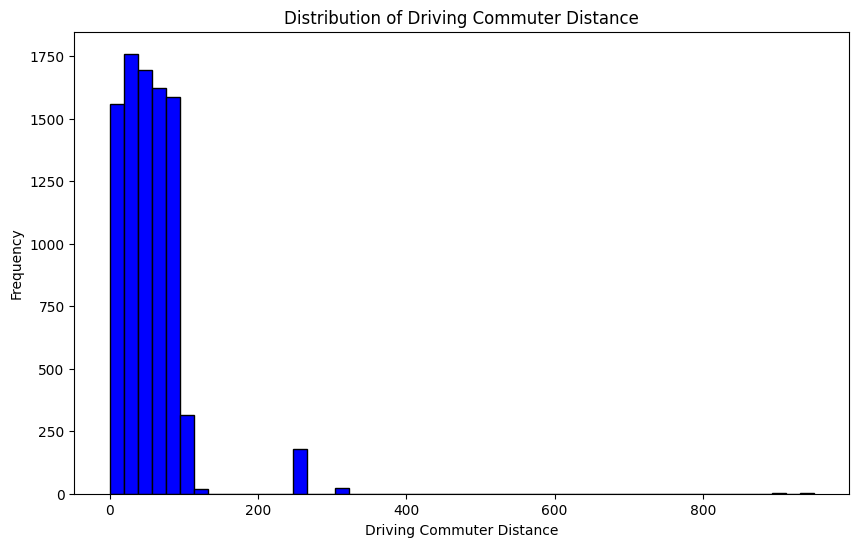

In [37]:
plt.figure(figsize=(10, 6))  
plt.hist(employee_data['DrivingCommuterDistance'].dropna(), bins=50, color='blue', edgecolor='black') 
plt.title('Distribution of Driving Commuter Distance')
plt.xlabel('Driving Commuter Distance')
plt.ylabel('Frequency')

plt.show()


In [38]:

print(employee_data['DrivingCommuterDistance'].dropna().median())
employee_data['DrivingCommuterDistance'] = employee_data['DrivingCommuterDistance'].mask(employee_data['DrivingCommuterDistance'] > 147, 49)
employee_data['DrivingCommuterDistance'] = employee_data['DrivingCommuterDistance'].fillna(49)
print(employee_data['DrivingCommuterDistance'].describe())
employee_data.isna().sum()


49.0
count    10100.000000
mean        48.785149
std         25.951599
min          0.000000
25%         30.000000
50%         49.000000
75%         68.000000
max        125.000000
Name: DrivingCommuterDistance, dtype: float64


EmployeeNumber                     0
Age                                0
Tenure                             0
Turnover                           0
HourlyRate                         0
HoursWeekly                        0
CompensationType                   0
AnnualSalary                       0
DrivingCommuterDistance            0
JobRoleArea                        0
Gender                             0
MaritalStatus                      0
NumCompaniesPreviouslyWorked     663
AnnualProfessionalDevHrs        1947
PaycheckMethod                     0
TextMessageOptIn                2258
dtype: int64

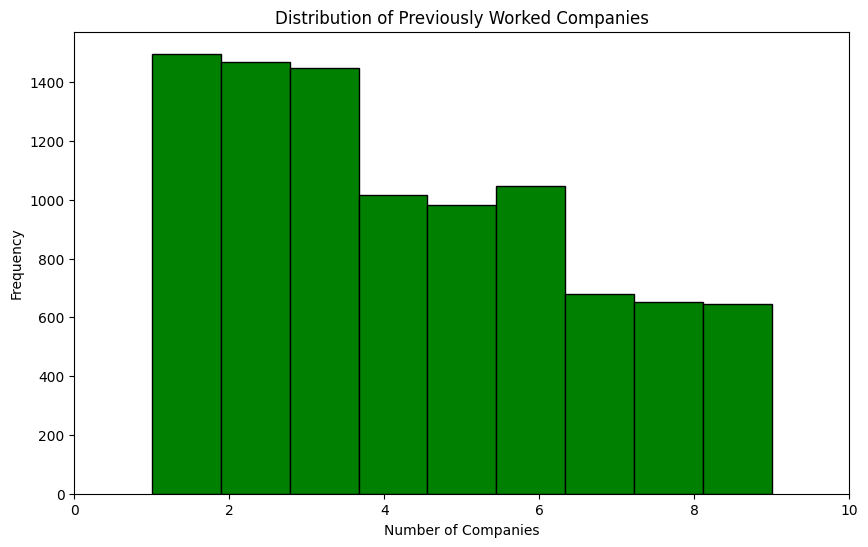

In [39]:
plt.figure(figsize=(10, 6))  
plt.hist(employee_data['NumCompaniesPreviouslyWorked'].dropna(), bins=9, color='green', edgecolor='black')
plt.xlim(0, 10)
plt.title('Distribution of Previously Worked Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Frequency')

plt.show()




In [40]:
print(employee_data['NumCompaniesPreviouslyWorked'].median())
print(employee_data['NumCompaniesPreviouslyWorked'].mean())
employee_data['NumCompaniesPreviouslyWorked'] = employee_data['NumCompaniesPreviouslyWorked'].fillna(4)

print(employee_data.isna().sum())

4.0
4.219985164776942
EmployeeNumber                     0
Age                                0
Tenure                             0
Turnover                           0
HourlyRate                         0
HoursWeekly                        0
CompensationType                   0
AnnualSalary                       0
DrivingCommuterDistance            0
JobRoleArea                        0
Gender                             0
MaritalStatus                      0
NumCompaniesPreviouslyWorked       0
AnnualProfessionalDevHrs        1947
PaycheckMethod                     0
TextMessageOptIn                2258
dtype: int64


count    8153.000000
mean       14.943579
std         6.084255
min         5.000000
25%        10.000000
50%        15.000000
75%        20.000000
max        25.000000
Name: AnnualProfessionalDevHrs, dtype: float64


Text(0, 0.5, 'Frequency')

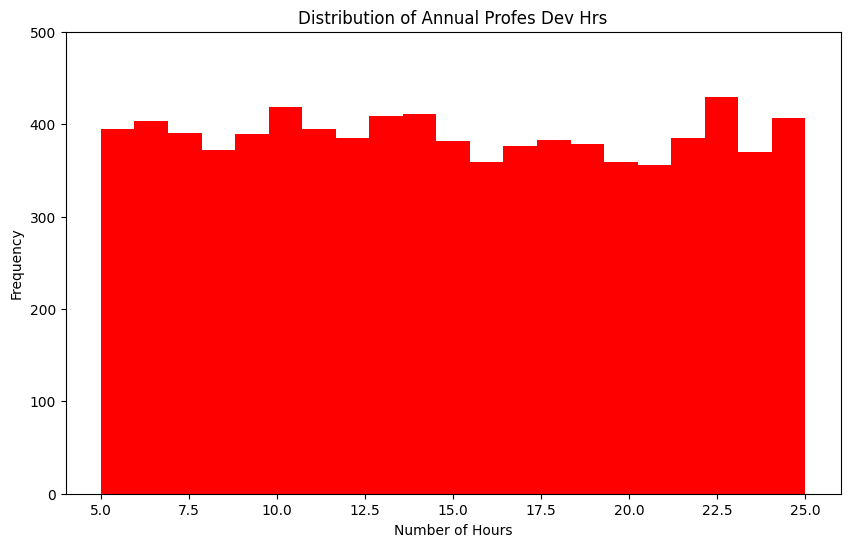

In [41]:
print(employee_data['AnnualProfessionalDevHrs'].describe())
plt.figure(figsize=(10, 6))  
plt.hist(employee_data['AnnualProfessionalDevHrs'].dropna(), bins=21, color='red')
plt.ylim([0, 500])
plt.title('Distribution of Annual Profes Dev Hrs')
plt.xlabel('Number of Hours')
plt.ylabel('Frequency')

In [42]:
print(employee_data['AnnualProfessionalDevHrs'].mean())
print(employee_data['AnnualProfessionalDevHrs'].median())

employee_data['AnnualProfessionalDevHrs'] = employee_data['AnnualProfessionalDevHrs'].fillna(15)
employee_data.isna().sum()

14.9435790506562
15.0


EmployeeNumber                     0
Age                                0
Tenure                             0
Turnover                           0
HourlyRate                         0
HoursWeekly                        0
CompensationType                   0
AnnualSalary                       0
DrivingCommuterDistance            0
JobRoleArea                        0
Gender                             0
MaritalStatus                      0
NumCompaniesPreviouslyWorked       0
AnnualProfessionalDevHrs           0
PaycheckMethod                     0
TextMessageOptIn                2258
dtype: int64

In [43]:

#Fill null values in Text Message Opt-In with mode

print(employee_data['TextMessageOptIn'].value_counts())
employee_data['TextMessageOptIn'] = employee_data['TextMessageOptIn'].fillna('Yes')
print(employee_data['TextMessageOptIn'].isna().sum())



TextMessageOptIn
Yes    7299
No      543
Name: count, dtype: int64
0


In [44]:
employee_data['AnnualSalary']= employee_data['AnnualSalary'].mask(employee_data['AnnualSalary'] < 0)
print(employee_data['AnnualSalary'].isna().sum())

computed_salary = employee_data.HourlyRate * 2080
employee_data = employee_data.fillna({'AnnualSalary': computed_salary})

inconsistent_salary = employee_data[employee_data['AnnualSalary'] < computed_salary]

inconsistent_salary['AnnualSalary'] = computed_salary

consistent_salary = inconsistent_salary

employee_data.update(consistent_salary)
print(employee_data['AnnualSalary'].describe())

53


/var/folders/5z/ygf2gykn21s37gz20p2w7pwr0000gn/T/ipykernel_927/395271229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inconsistent_salary['AnnualSalary'] = computed_salary


count     10100.000000
mean     122153.656673
std       76094.429409
min       35796.800000
25%       64646.400000
50%      101774.400000
75%      153717.200000
max      339950.400000
Name: AnnualSalary, dtype: float64


Text(0, 0.5, 'Frequency')

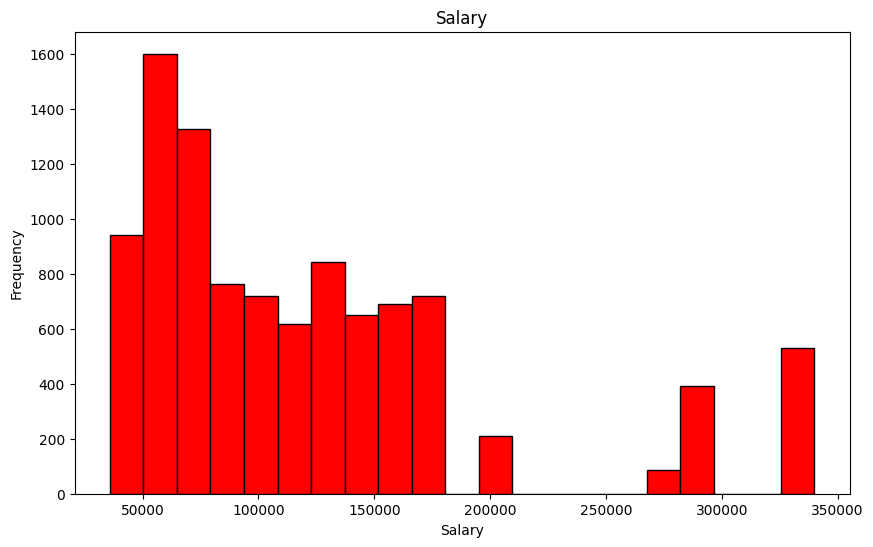

In [45]:
plt.figure(figsize=(10, 6))  
plt.hist(employee_data['AnnualSalary'], bins=21, color='red', edgecolor='black')
plt.title('Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

In [46]:
employee_data['AnnualSalary'].describe()

employee_data['AnnualSalary'] = employee_data['AnnualSalary'].mask(employee_data['AnnualSalary'] > 287323)

employee_data['AnnualSalary'] = employee_data['AnnualSalary'].fillna(computed_salary)

employee_data.isna().sum()

EmployeeNumber                  0
Age                             0
Tenure                          0
Turnover                        0
HourlyRate                      0
HoursWeekly                     0
CompensationType                0
AnnualSalary                    0
DrivingCommuterDistance         0
JobRoleArea                     0
Gender                          0
MaritalStatus                   0
NumCompaniesPreviouslyWorked    0
AnnualProfessionalDevHrs        0
PaycheckMethod                  0
TextMessageOptIn                0
dtype: int64

Text(0, 0.5, 'Frequency')

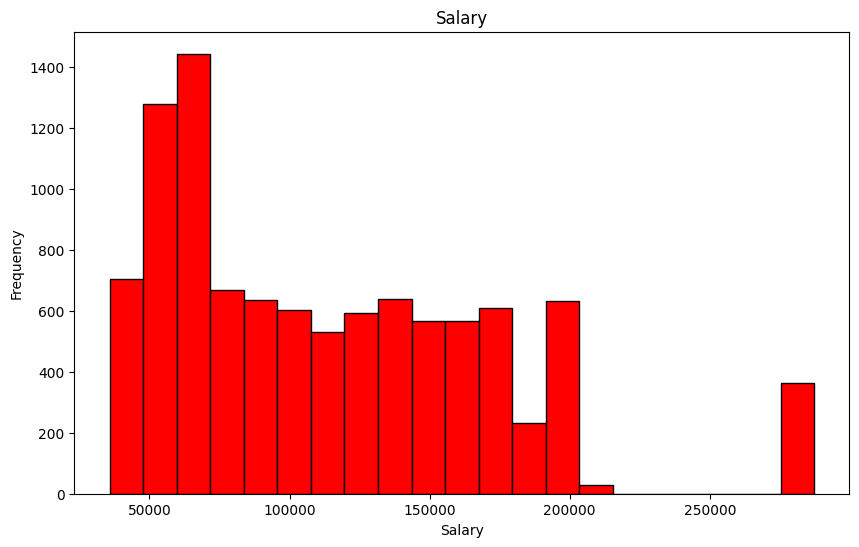

In [47]:
plt.figure(figsize=(10, 6))  
plt.hist(employee_data['AnnualSalary'], bins=21, color='red', edgecolor='black')
plt.title('Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

In [48]:

print(employee_data['AnnualSalary'].describe())
employee_data.to_csv('clean_employee_data.csv')

count     10100.000000
mean     113643.678297
std       57866.087914
min       35796.800000
25%       64646.400000
50%      101774.400000
75%      153717.200000
max      287262.400000
Name: AnnualSalary, dtype: float64
